# Clustering - FIFA 22

# Import balíčků

In [124]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.preprocessing, sklearn.cluster, sklearn.metrics
import scipy.spatial
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!kaggle datasets download -d cashncarry/fifa-22-complete-player-dataset


Dataset URL: https://www.kaggle.com/datasets/cashncarry/fifa-22-complete-player-dataset
License(s): CC-BY-NC-SA-4.0
fifa-22-complete-player-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip fifa-22-complete-player-dataset.zip


Archive:  fifa-22-complete-player-dataset.zip
replace players_fifa22.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: players_fifa22.csv      
replace teams_fifa22.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: teams_fifa22.csv        


# Načtení datasetu

In [125]:
df = pd.read_csv('players_fifa22.csv')


# Task 1 (15p)
- The first is about performing an EDA over the assigned dataset to get an insight about the dataset
    - Exploratory data analysis for assigned dataset.
    - Description of data and your work containing hypothesis/answers.
    - Visualizations and result's explanation.
    - 📒 Comment your analysis insight gained in a Markdown cells

#EDA

#Top 15 hráčů

In [126]:
df.head(15)

,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,158023,L. Messi,Lionel Messi,34,170,72,https://cdn.sofifa.com/players/158/023/22_60.png,Argentina,93,93,...,93,90,93,69,67,69,64,53,64,22
1,188545,R. Lewandowski,Robert Lewandowski,32,185,81,https://cdn.sofifa.com/players/188/545/22_60.png,Poland,92,92,...,87,83,87,67,69,67,64,63,64,22
2,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,36,187,83,https://cdn.sofifa.com/players/020/801/22_60.png,Portugal,91,91,...,89,81,89,66,62,66,63,56,63,23
3,231747,K. Mbappé,Kylian Mbappé,22,182,73,https://cdn.sofifa.com/players/231/747/22_60.png,France,91,95,...,92,84,92,70,66,70,66,57,66,21
4,200389,J. Oblak,Jan Oblak,28,188,87,https://cdn.sofifa.com/players/200/389/22_60.png,Slovenia,91,93,...,38,41,38,35,39,35,35,36,35,92
5,192985,K. De Bruyne,Kevin De Bruyne,30,181,70,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,91,91,...,91,91,91,82,83,82,78,72,78,24
6,190871,Neymar Jr,Neymar da Silva Santos Jr.,29,175,68,https://cdn.sofifa.com/players/190/871/22_60.png,Brazil,91,91,...,91,85,91,70,66,70,65,53,65,23
7,215914,N. Kanté,N'Golo Kanté,30,168,70,https://cdn.sofifa.com/players/215/914/22_60.png,France,90,90,...,82,85,82,88,90,88,88,87,88,23
8,202126,H. Kane,Harry Kane,27,188,89,https://cdn.sofifa.com/players/202/126/22_60.png,England,90,90,...,87,85,87,70,71,70,67,64,67,23
9,192448,M. ter Stegen,Marc-André ter Stegen,29,187,85,https://cdn.sofifa.com/players/192/448/22_60.png,Germany,90,92,...,42,48,42,36,44,36,34,36,34,91


#Počty záznamů a sloupců

In [127]:
df.shape

(19260, 90)

- 19 260 záznamů o hráčích
- 90 jejich atributů

#Datové typy

In [128]:
df.dtypes

,0
ID,int64
Name,object
FullName,object
Age,int64
Height,int64
...,...
RWBRating,int64
LBRating,int64
CBRating,int64
RBRating,int64


#Kontrola chybějících hodnot

In [129]:
df.isnull().sum()

,0
ID,0
Name,0
FullName,0
Age,0
Height,0
...,...
RWBRating,0
LBRating,0
CBRating,0
RBRating,0


 - Ve všech 90 sloupcích nechybí žádné hodnoty.

# Číselné sloupce

In [130]:
# Describing the dataset
df.describe()

,ID,Age,Height,Weight,Overall,Potential,Growth,TotalStats,BaseStats,ValueEUR,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
count,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,1.926000e+04,...,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000
mean,231682.741952,25.184683,181.305036,74.950779,65.815628,71.100104,5.284476,1598.525909,357.062461,2.857652e+06,...,58.364434,57.227207,58.364434,56.197040,55.771340,56.197040,55.539823,54.379595,55.539823,23.242939
std,26960.272515,4.737340,6.866151,7.066864,6.817297,6.092103,5.472201,271.575855,39.910613,7.604532e+06,...,13.989045,13.212152,13.989045,13.818416,13.856922,13.818416,14.063862,14.678658,14.063862,15.053823
min,41.000000,16.000000,155.000000,49.000000,48.000000,49.000000,0.000000,767.000000,227.000000,0.000000e+00,...,17.000000,17.000000,17.000000,17.000000,18.000000,17.000000,16.000000,18.000000,16.000000,10.000000
25%,214903.500000,21.000000,176.000000,70.000000,62.000000,67.000000,0.000000,1462.000000,329.000000,4.750000e+05,...,54.000000,52.000000,54.000000,51.000000,48.000000,51.000000,49.000000,44.000000,49.000000,17.000000
50%,236687.500000,25.000000,181.000000,75.000000,66.000000,71.000000,4.000000,1633.000000,358.000000,9.750000e+05,...,62.000000,60.000000,62.000000,59.000000,59.000000,59.000000,59.000000,58.000000,59.000000,18.000000
75%,253607.500000,29.000000,186.000000,80.000000,70.000000,75.000000,9.000000,1782.000000,384.000000,2.000000e+06,...,67.000000,66.000000,67.000000,65.000000,66.000000,65.000000,65.000000,66.000000,65.000000,20.000000
max,264705.000000,54.000000,206.000000,110.000000,93.000000,95.000000,26.000000,2341.000000,501.000000,1.940000e+08,...,93.000000,91.000000,93.000000,88.000000,90.000000,88.000000,88.000000,89.000000,88.000000,92.000000


- popis číselných sloupců
- min, max, mean, count

In [131]:
# Exploring the dataset
df.columns

Index(['ID', 'Name', 'FullName', 'Age', 'Height', 'Weight', 'PhotoUrl',
       'Nationality', 'Overall', 'Potential', 'Growth', 'TotalStats',
       'BaseStats', 'Positions', 'BestPosition', 'Club', 'ValueEUR', 'WageEUR',
       'ReleaseClause', 'ClubPosition', 'ContractUntil', 'ClubNumber',
       'ClubJoined', 'OnLoad', 'NationalTeam', 'NationalPosition',
       'NationalNumber', 'PreferredFoot', 'IntReputation', 'WeakFoot',
       'SkillMoves', 'AttackingWorkRate', 'DefensiveWorkRate', 'PaceTotal',
       'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal',
       'PhysicalityTotal', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking',


#Vytvářím popisnou statistiku pro kategorické sloupce.

In [132]:
df.describe(include=['object'])

,Name,FullName,PhotoUrl,Nationality,Positions,BestPosition,Club,ClubPosition,NationalTeam,NationalPosition,PreferredFoot,AttackingWorkRate,DefensiveWorkRate
count,19260,19260,19260,19260,19260,19260,19260,19184,19260,757,19260,19260,19260
unique,18058,19042,19156,163,672,15,702,19,34,18,2,3,3
top,J. Rodríguez,Lucas Rodríguez,https://cdn.sofifa.com/players/230/388/22_60.png,England,CB,CB,Free agent,SUB,Not in team,SUB,Right,Medium,Medium
freq,12,4,2,1718,2410,3744,76,8293,18503,400,14670,12701,14176


- Name - Jméno hráče
- FullName - Celé jméno
- PhotoUrl - Odkaz na fotografii hráče
- Nationality - Národnost
- Positions - posty, na kterých může hrát
- BestPosition - jeho nejhranější pozice, nejlepší
- Club - v jakém klubu hraje (může být i Free Agent)
- ClubPosition - pozice, na které hraje v klubu
- OnLoad - pokud má výstupní klauzuli, tak je True
- NationalTeam - národní tým, za který hraje (může být, že v žádném nehraje)
- NationalPosition - pozice v národním týmu
- PreferredFoot - hlavní noha hráče
- AttackingWorkRate - Síla útočení (Low, Medium, High)
- DefensiveWorkRate - Síla bránění (Low, Medium, High)

#Rozložení podle věku

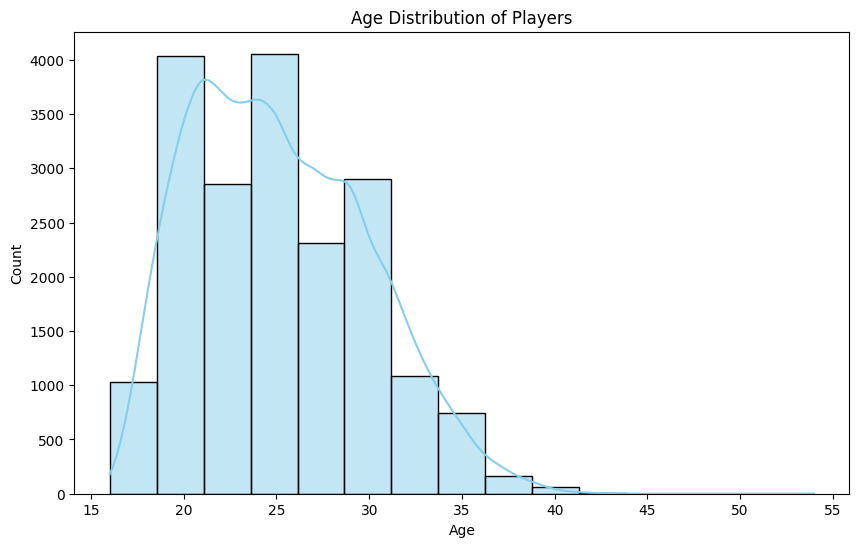

In [133]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=15, kde=True, color='skyblue')
plt.title('Age Distribution of Players')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Většina hráčů je ve věku mezi 20 a 30 lety, přičemž počet hráčů klesá s rostoucím věkem.

#10 nejschopnějších hráčů podle potenciálu

In [134]:
top_10_overall = df[['Name', 'Overall']].sort_values(by='Overall', ascending=False).head(10)

top_10_overall





,Name,Overall
0,L. Messi,93
1,R. Lewandowski,92
2,Cristiano Ronaldo,91
3,K. Mbappé,91
4,J. Oblak,91
5,K. De Bruyne,91
6,Neymar Jr,91
7,N. Kanté,90
8,H. Kane,90
9,M. ter Stegen,90


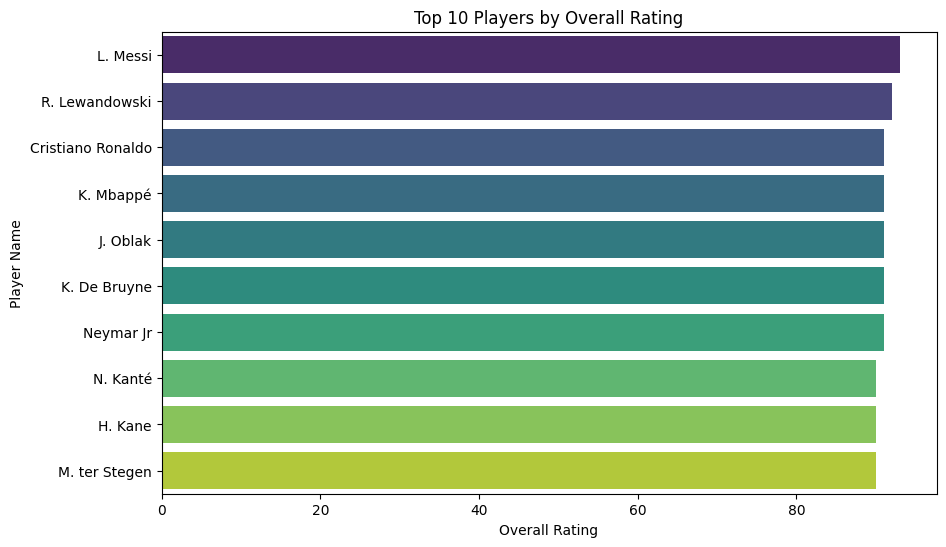

In [135]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Overall', y='Name', data=top_10_overall, palette='viridis', hue='Name', legend=False)
plt.title('Top 10 Players by Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Player Name')
plt.show()


- Nejlepším hráčem z celého datasetu je Lionel Messi z hodnocením (Overall) 93.

#Korelace mezi věkem a potenciálem

In [136]:

correlation = df[['Age', 'Overall']].corr()
correlation


,Age,Overall
Age,1.000000,0.447372
Overall,0.447372,1.000000


#Vizualizace korelace mezi věkem a potenciálem

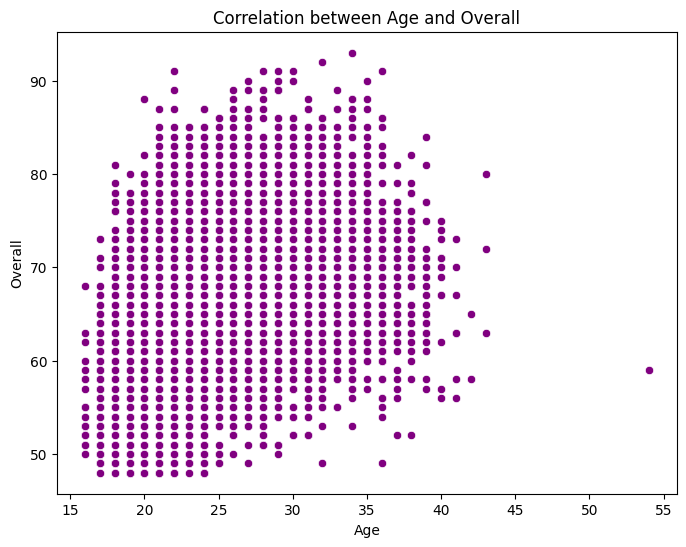

In [137]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Overall', data=df, color='purple')


plt.title('Correlation between Age and Overall')
plt.xlabel('Age')
plt.ylabel('Overall')

plt.show()



**Hypotéza:**

Mladí hráči (ve věku kolem 20-25 let) mají vyšší celkový rating (Overall), protože jsou na začátku své kariéry a mají vysoký potenciál pro zlepšení. S věkem se celkový rating může snižovat kvůli fyzickým změnám a ztrátě formy.

# Vizualizace rozložení podle věku, výšky a hmotnosti

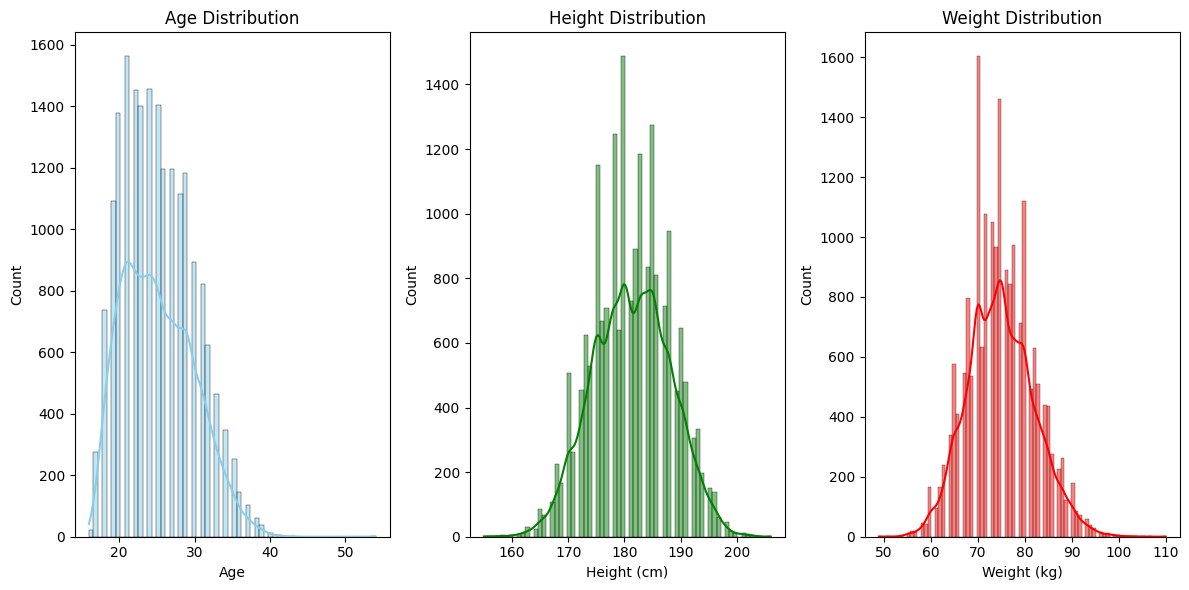

In [138]:

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
sns.histplot(df['Height'], kde=True, color='green')
plt.title('Height Distribution')
plt.xlabel('Height (cm)')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
sns.histplot(df['Weight'], kde=True, color='red')
plt.title('Weight Distribution')
plt.xlabel('Weight (kg)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


**Rozložení podle věku:**

Většina hráčů je ve věku mezi 20 a 30 lety, což je typické pro profesionální fotbalisty. Méně hráčů je mladších než 18 let nebo starších než 35 let.

**Rozložení podle výšky:**

Většina hráčů má výšku mezi 170 a 185 cm, což je standardní pro fotbalisty. Méně hráčů má výšku pod 170 cm nebo nad 190 cm.

**Rozložení podle váhy:**

Váha hráčů se většinou pohybuje mezi 65 a 85 kg. Méně hráčů má extrémní hodnoty váhy.

# Vizuální znázornění vztahu mezi věkem, výškou, hmotností a fyzickými vlastnostmi hráčů, jako jsou síla, rychlost sprintu a obratnost.

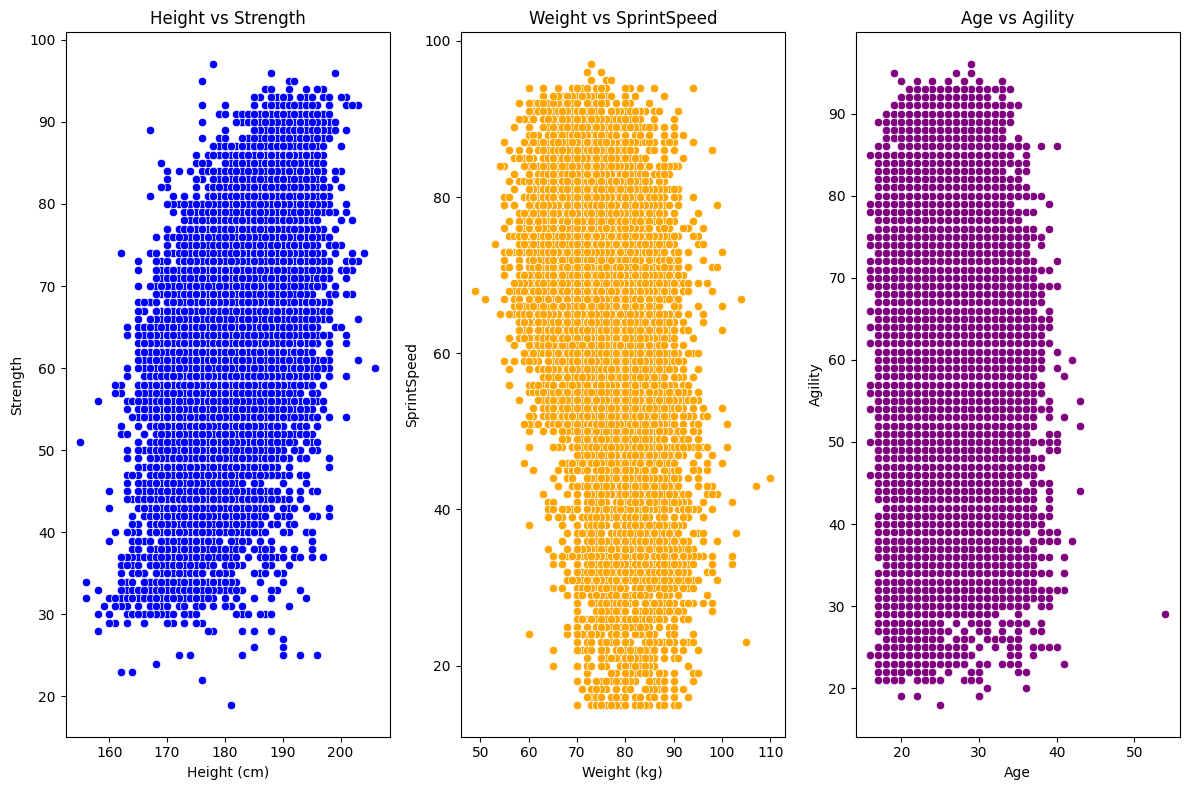

In [139]:
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
sns.scatterplot(x='Height', y='Strength', data=df, color='blue')
plt.title('Height vs Strength')
plt.xlabel('Height (cm)')
plt.ylabel('Strength')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Weight', y='SprintSpeed', data=df, color='orange')
plt.title('Weight vs SprintSpeed')
plt.xlabel('Weight (kg)')
plt.ylabel('SprintSpeed')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Age', y='Agility', data=df, color='purple')
plt.title('Age vs Agility')
plt.xlabel('Age')
plt.ylabel('Agility')

plt.tight_layout()
plt.show()


**Hypotéza:**

Věk, výška a hmotnost mohou mít určitou korelaci s konkrétními hodnoceními hráčů, jako je síla, rychlost sprintu, obratnost


**Height vs Strength**

Existuje pozitivní vztah mezi výškou a silou: vyšší hráči obvykle mají větší sílu. Nicméně tento vztah není absolutní.

**Weight vs SprintSpeed**

Vztah mezi váhou a rychlostí sprintu je slabý. To znamená, že váha nemá výrazný vliv na rychlost sprintu.

**Age vs Agility**

Na grafu je vidět, že s rostoucím věkem se obratnost hráčů snižuje. Mladí hráči obvykle vykazují vyšší hodnoty obratnosti.


# 10 nejpopulárnějších zemí podle počtu hráčů

In [140]:

top_10_nationalities = df['Nationality'].value_counts().head(10)
print(top_10_nationalities)


Nationality
England          1718
Germany          1214
Spain            1091
France            987
Argentina         955
Brazil            913
Japan             544
Netherlands       439
United States     411
Poland            403
Name: count, dtype: int64


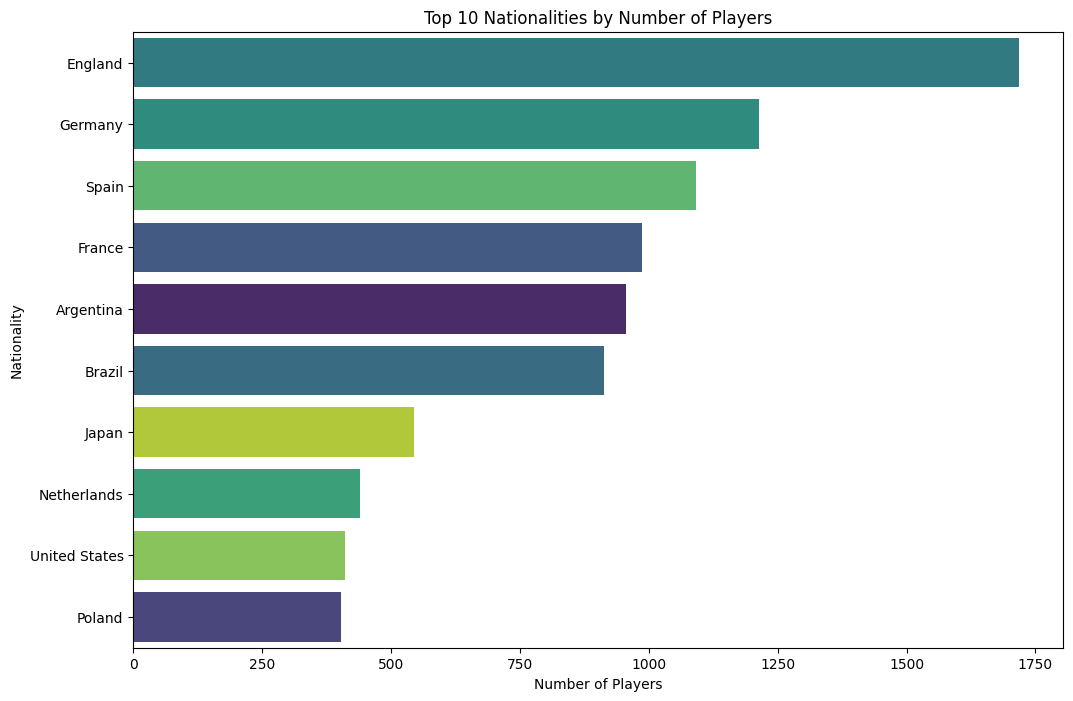

In [141]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Nationality', data=df[df['Nationality'].isin(top_10_nationalities.index)],
              order=top_10_nationalities.index, hue='Nationality', palette='viridis', legend=False)
plt.title('Top 10 Nationalities by Number of Players')
plt.xlabel('Number of Players')
plt.ylabel('Nationality')
plt.show()



Největší počet hráčů pochází z Anglie

#Top 10 zemí s největším počtem nejlepších hráčů

In [142]:
top_players = df[df['Overall'] >= 85]

In [143]:
top_players_by_nationality = top_players['Nationality'].value_counts()

In [144]:
print("\nTop 10 Countries with the Most Top Players:")
top_players_by_nationality.head(10)


Top 10 Countries with the Most Top Players:


,count
Nationality,
Spain,13
Germany,10
Brazil,8
France,8
Italy,7
England,7
Argentina,6
Belgium,5
Netherlands,5


#Vizuální znázornění top 10 zemí s největším počtem nejlepších hráčů.

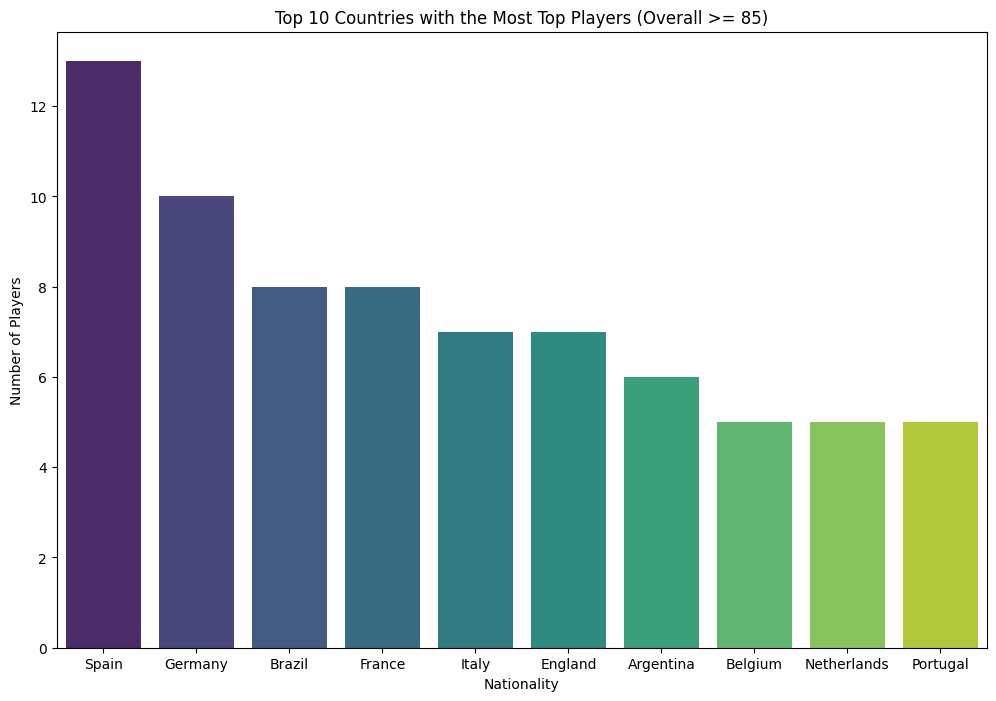

In [145]:

plt.figure(figsize=(12, 8))
sns.barplot(x=top_players_by_nationality.head(10).index,
            y=top_players_by_nationality.head(10).values,
            hue=top_players_by_nationality.head(10).index,
            palette='viridis',
            legend=False)

plt.title('Top 10 Countries with the Most Top Players (Overall >= 85)')
plt.xlabel('Nationality')
plt.ylabel('Number of Players')
plt.show()


Španělsko má nejvíce top-rated hráčů ze všech zemí.

#Task 2 (30p)
- The second task is focused on the clustering analysis

- Describe your preprocessing pipeline

- This step can also be based on the insight from the first task
I.e. Describe what operations you are performing for each of the features
e.g. No operation needed, dropping the feature, Min-Max scaling, One-hot encoding, Categorization (numeric -> categorical) etc.
You can even try to experiment with many different preprocession operations and you will see what works the best -
This is totally up to you!

#Part 1
Use the K-Means algorithm first
Define the number of clusters
- 🚀 Use the elbow method and/or silhouette coefficient as a hint and reason the defined number of clusters
- 💡 You can also solve this whole part for various numbers of clusters and select the most meaningful result
Perform the clustering
- Describe the found clusters in a Markdown cells
💡 We recommend using the boxplots, bar plots, scatter plots, etc. for comparing the feature values among the found cluster IDs
- 📒 MANDATORY: Define the cluster characteristics in a Markdown cell after you perform the analysis!

### Clustering
Příprava dat, což zahrnuje odstranění nepotřebných sloupců, odstranění duplicitních záznamů a úpravu dat, jak kategorických, tak číselných, pomocí vhodného způsobu kódování.

### Duplicitní záznamy
Během analýzy datasetu jsem zjistil, že některé hráče obsahuje několikrát se stejnými hodnotami

In [146]:
print(f"Nalezeno "+ df.duplicated().sum().__str__() + " duplicitních záznamů")

Nalezeno 104 duplicitních záznamů


In [147]:
duplicates = df[df.duplicated()]

print(f"Nalezeno {len(duplicates)} duplicitních záznamů")

print(duplicates)


Nalezeno 104 duplicitních záznamů
          ID              Name                         FullName  Age  Height  \
1565  244385       G. Bushchan                 Georgiy Bushchan   27     196   
1574  236699          S. Lukić                       Saša Lukić   24     183   
1580  237221          J. Foyth                       Juan Foyth   23     187   
1583  237556      C. Luyindama              Christian Luyindama   27     191   
1586  237819      N. Domínguez                Nicolás Domínguez   23     179   
...      ...               ...                              ...  ...     ...   
1954  230323    Kaíquão Castro  Kaíque Osvaldo Castro Rodrigues   25     190   
1955  230295  Cris Laranjeiros      Cristian Also Laranjeiro Sá   29     185   
1956  230252        Jorginhson       Jorgino Silas Ruiz Prestes   29     178   
1957  230250     Emilio Piodão         Emilio Alex Piodão Esser   29     177   
1958  230244      Leo Vimieiro   Leôncio Roger Vimieiro Madeira   25     168   

     

- Je tedy potřeba odstranit tyto záznamy.

In [148]:
df = df.drop_duplicates()
df.duplicated().sum()

0

#Z datového souboru vybereme pouze sloupce, které stojí za analýzu.

In [149]:
selected_columns = [
    'Age',
    'Height',
    'Weight',
    'Overall',
    'Potential',
    'TotalStats',
    'PaceTotal',
    'ShootingTotal',
    'PassingTotal',
    'DribblingTotal',
    'DefendingTotal',
    'PhysicalityTotal',
    'Nationality',
    'ValueEUR',
    'Reactions',
    'Aggression',
    'Interceptions',
    'BestPosition',
    'PreferredFoot'
]


df_clustering = df[selected_columns]



In [150]:
df_clustering.head()

,Age,Height,Weight,Overall,Potential,TotalStats,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Nationality,ValueEUR,Reactions,Aggression,Interceptions,BestPosition,PreferredFoot
0,34,170,72,93,93,2219,85,92,91,95,34,65,Argentina,78000000,94,44,40,RW,Left
1,32,185,81,92,92,2212,78,92,79,85,44,82,Poland,119500000,93,81,49,ST,Right
2,36,187,83,91,91,2208,87,94,80,87,34,75,Portugal,45000000,94,63,29,ST,Right
3,22,182,73,91,95,2175,97,88,80,92,36,77,France,194000000,93,62,38,ST,Right
4,28,188,87,91,93,1413,87,92,78,90,52,90,Slovenia,112000000,88,34,19,GK,Right


#Počty záznamů a sloupců

In [151]:
df_clustering.shape

(19156, 19)

- 19156 záznamů o hráčích
- 19 jejich atributů

# Číselné sloupce

In [152]:
df_clustering.describe(include=np.number)

,Age,Height,Weight,Overall,Potential,TotalStats,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,ValueEUR,Reactions,Aggression,Interceptions
count,19156.000000,19156.000000,19156.000000,19156.000000,19156.000000,19156.000000,19156.000000,19156.000000,19156.000000,19156.000000,19156.000000,19156.000000,1.915600e+04,19156.000000,19156.000000,19156.000000
mean,25.190750,181.304865,74.953226,65.765765,71.050793,1597.340781,67.873095,53.499478,57.805857,62.978545,50.012842,64.644968,2.825776e+06,61.433598,55.546043,46.614690
std,4.743117,6.865032,7.068063,6.802014,6.066385,271.351433,10.654588,13.806390,9.828530,9.691676,16.367141,9.626229,7.609954e+06,8.979389,16.943930,20.663875
min,16.000000,155.000000,49.000000,48.000000,49.000000,767.000000,28.000000,18.000000,25.000000,26.000000,14.000000,29.000000,0.000000e+00,25.000000,10.000000,3.000000
25%,21.000000,176.000000,70.000000,61.000000,67.000000,1461.000000,62.000000,44.000000,51.000000,58.000000,35.000000,58.000000,4.750000e+05,56.000000,44.000000,26.000000
50%,25.000000,181.000000,75.000000,66.000000,71.000000,1631.000000,68.000000,56.000000,58.000000,64.000000,54.000000,66.000000,9.750000e+05,62.000000,58.000000,53.000000
75%,29.000000,186.000000,80.000000,70.000000,75.000000,1781.000000,75.000000,64.000000,64.000000,69.000000,63.000000,72.000000,2.000000e+06,67.000000,68.000000,64.000000
max,54.000000,206.000000,110.000000,93.000000,95.000000,2341.000000,97.000000,94.000000,93.000000,95.000000,91.000000,92.000000,1.940000e+08,94.000000,95.000000,91.000000


<Axes: >

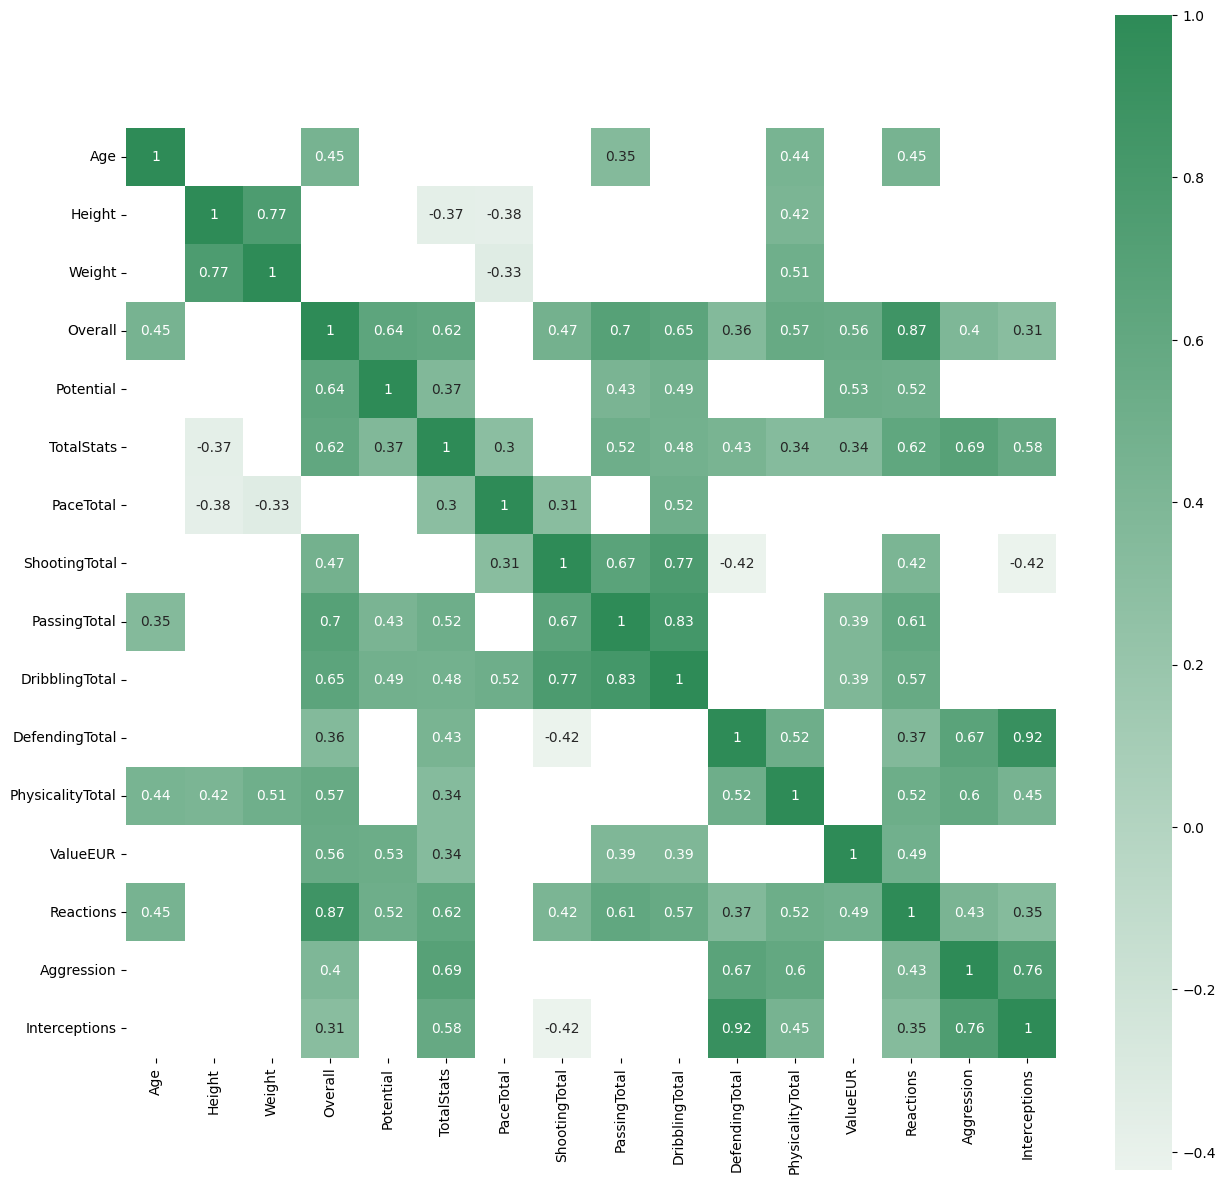

In [153]:
# Remove non-numeric columns
dfTemp = df_clustering.select_dtypes(include=np.number)

plt.figure(figsize=(15, 15))
sns.heatmap(dfTemp.corr()[np.abs(dfTemp.corr()) >= 0.3], square=True, cmap=sns.light_palette("seagreen", as_cmap=True), annot=True)

### Uprava Kategorickych sloupcu - get_dummies

In [154]:
df_enc = pd.DataFrame(index = df_clustering.index)

- Do df_enc ukládám upravené sloupce, které následně použiji pro analýzu shlukování (clustering).
- Pro kategoriální sloupce použiji metodu get_dummies, která je rozdělí na jednotlivé binární sloupce. Je to nejjednodušší způsob, protože v těchto datech neexistuje žádná přímá souvislost mezi hodnotami.

#V tomto kódu provádíme kódování kategorických sloupců 'BestPosition', 'PreferredFoot' a 'Nationality' pomocí metody get_dummies, čímž vytváříme binární sloupce pro každou kategorii.

In [155]:
df_enc = df_enc.join(pd.get_dummies(df[['BestPosition', 'PreferredFoot', 'Nationality',]]))
df_enc.head()

,BestPosition_CAM,BestPosition_CB,BestPosition_CDM,BestPosition_CF,BestPosition_CM,BestPosition_GK,BestPosition_LB,BestPosition_LM,BestPosition_LW,BestPosition_LWB,...,Nationality_Ukraine,Nationality_United Arab Emirates,Nationality_United States,Nationality_Uruguay,Nationality_Uzbekistan,Nationality_Venezuela,Nationality_Vietnam,Nationality_Wales,Nationality_Zambia,Nationality_Zimbabwe
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#V tomto kódu normalizujeme hodnoty numerických sloupců pomocí MinMaxScaler pro škálování hodnot do stanoveného rozsahu a pomocí PowerTransformer pro transformaci dat na symetričtější rozdělení

In [156]:
from sklearn.preprocessing import MinMaxScaler, PowerTransformer

minmax_columns = [
    'Age', 'Height', 'Weight', 'Overall', 'Potential', 'PaceTotal',
    'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal',
    'PhysicalityTotal'
]

power_columns = [
    'TotalStats', 'ValueEUR', 'Reactions', 'Aggression', 'Interceptions'
]

scaler = MinMaxScaler()
df_enc[minmax_columns] = scaler.fit_transform(df_clustering[minmax_columns])

power_transformer = PowerTransformer()
df_enc[power_columns] = power_transformer.fit_transform(df_clustering[power_columns])



In [157]:
df_enc.head()

,BestPosition_CAM,BestPosition_CB,BestPosition_CDM,BestPosition_CF,BestPosition_CM,BestPosition_GK,BestPosition_LB,BestPosition_LM,BestPosition_LW,BestPosition_LWB,...,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,TotalStats,ValueEUR,Reactions,Aggression,Interceptions
0,False,False,False,False,False,False,False,False,False,False,...,0.973684,0.970588,1.000000,0.259740,0.571429,2.962034,3.903221,3.796851,-0.751648,-0.342276
1,False,False,False,False,False,False,False,False,False,False,...,0.973684,0.794118,0.855072,0.389610,0.841270,2.919997,4.403299,3.675145,1.644072,0.096710
2,False,False,False,False,False,False,False,False,False,False,...,1.000000,0.808824,0.884058,0.259740,0.730159,2.896053,3.291291,3.796851,0.394882,-0.867791
3,False,False,False,False,False,False,False,False,False,False,...,0.921053,0.808824,0.956522,0.285714,0.761905,2.700670,4.999727,3.675145,0.329900,-0.438803
4,False,False,False,False,False,True,False,False,False,False,...,0.973684,0.779412,0.927536,0.493506,0.968254,-0.785022,4.325837,3.070674,-1.272752,-1.331745


In [158]:
df_enc.describe()

,Age,Height,Weight,Overall,Potential,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,TotalStats,ValueEUR,Reactions,Aggression,Interceptions
count,19156.000000,19156.000000,19156.000000,19156.000000,19156.000000,19156.000000,19156.000000,19156.000000,19156.000000,19156.000000,19156.000000,1.915600e+04,1.915600e+04,1.915600e+04,1.915600e+04,1.915600e+04
mean,0.241862,0.515782,0.425463,0.394795,0.479365,0.577871,0.467098,0.482439,0.535921,0.467699,0.565793,7.121748e-17,2.848699e-16,4.035657e-16,2.017829e-16,1.186958e-16
std,0.124819,0.134608,0.115870,0.151156,0.131878,0.154414,0.181663,0.144537,0.140459,0.212560,0.152797,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.332772e+00,-5.260990e+00,-3.786072e+00,-2.222763e+00,-2.026041e+00
25%,0.131579,0.411765,0.344262,0.288889,0.391304,0.492754,0.342105,0.382353,0.463768,0.272727,0.460317,-6.210952e-01,-5.984783e-01,-6.164554e-01,-7.516475e-01,-1.008565e+00
50%,0.236842,0.509804,0.426230,0.400000,0.478261,0.579710,0.500000,0.485294,0.550725,0.519481,0.587302,1.765729e-02,-1.027655e-01,4.822862e-02,7.490699e-02,2.940074e-01
75%,0.342105,0.607843,0.508197,0.488889,0.565217,0.681159,0.605263,0.573529,0.623188,0.636364,0.682540,6.584304e-01,4.321594e-01,6.122916e-01,7.269966e-01,8.426223e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.722658e+00,4.999727e+00,3.796851e+00,2.712232e+00,2.220151e+00


In [159]:
X = df_enc.values

In [160]:
print(type(X))

<class 'numpy.ndarray'>


In [167]:
clustering_scores = []
for k in range(2, 11):
    clustering = sklearn.cluster.KMeans(n_clusters=k, random_state=42).fit(X)
    clustering_scores.append({
        'k': k,
        'sse': clustering.inertia_,
        'silhouette': sklearn.metrics.silhouette_score(X, clustering.labels_)
    })
df_clustering_scores = pd.DataFrame.from_dict(clustering_scores, orient='columns')
df_clustering_scores = df_clustering_scores.set_index('k')

In [168]:
df_clustering_scores

,sse,silhouette
k,,
2,104404.342505,0.221146
3,89941.235500,0.174858
4,82075.316717,0.169281
5,75899.859975,0.151129
6,72077.255027,0.139520
7,69721.599924,0.119456
8,67327.920561,0.129163
9,64764.168968,0.123040
10,62655.161475,0.126078


## Plot the SSE and Silhouette score

<Axes: xlabel='k', ylabel='sse'>

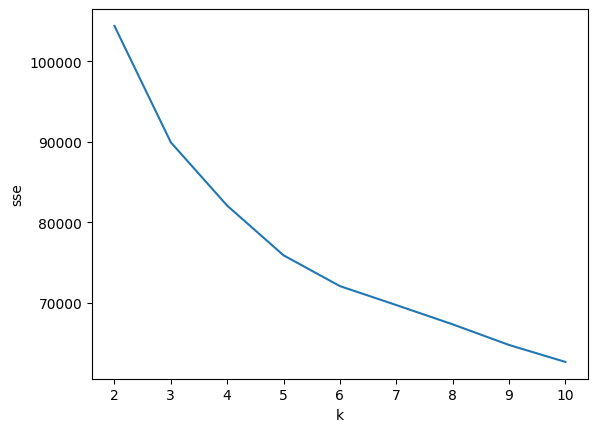

In [169]:
sns.lineplot(data = df_clustering_scores, y='sse', x='k')

<Axes: xlabel='k', ylabel='silhouette'>

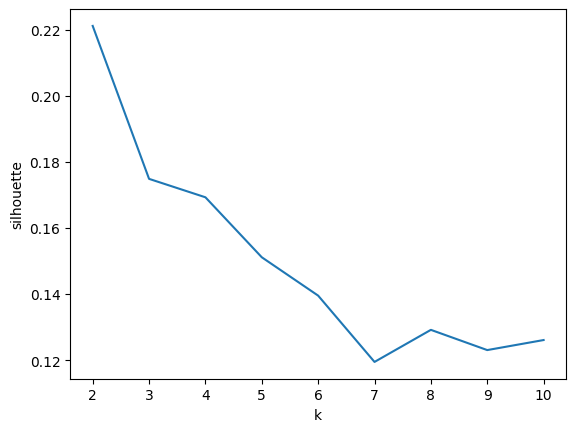

In [170]:
sns.lineplot(data = df_clustering_scores, y='silhouette', x='k')

- podle grafů vychází jako ideální hodnota k = 4

### Provedení clusteringu pro 4 clustery

In [171]:
cls1 = sklearn.cluster.KMeans(n_clusters=4)
clustering = cls1.fit(X)

- zjištění kolik hodnot obsahuje, který cluster.

In [172]:
pd.Series(clustering.labels_).value_counts()

,count
2,7470
1,4074
0,3853
3,3759


- je vidět, že vznikly jeden větší clustery a potom tri mnohem menší.

### Přidání sloupce určují cluster záznamu hráče.

In [185]:
df_clustering = df_clustering.copy()

df_clustering.loc[:, "cluster_id"] = clustering.labels_



### Zobrazení záznamů s identifikací id clusteru

In [186]:
df_clustering.head()

,Age,Height,Weight,Overall,Potential,TotalStats,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Nationality,ValueEUR,Reactions,Aggression,Interceptions,BestPosition,PreferredFoot,cluster_id
0,34,170,72,93,93,2219,85,92,91,95,34,65,Argentina,78000000,94,44,40,RW,Left,1
1,32,185,81,92,92,2212,78,92,79,85,44,82,Poland,119500000,93,81,49,ST,Right,1
2,36,187,83,91,91,2208,87,94,80,87,34,75,Portugal,45000000,94,63,29,ST,Right,1
3,22,182,73,91,95,2175,97,88,80,92,36,77,France,194000000,93,62,38,ST,Right,1
4,28,188,87,91,93,1413,87,92,78,90,52,90,Slovenia,112000000,88,34,19,GK,Right,0


###Počet hráčů V clusterech

<Axes: xlabel='cluster_id', ylabel='count'>

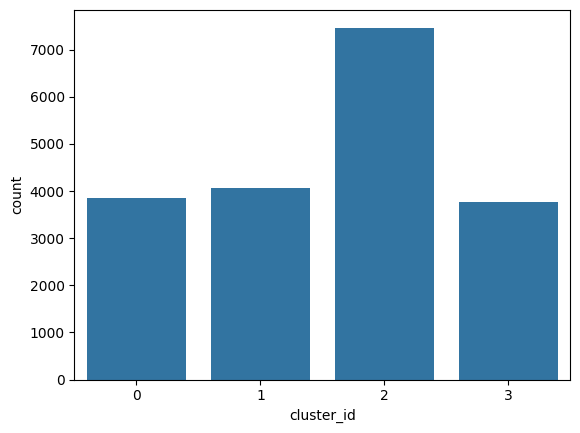

In [187]:
sns.countplot(data=df_clustering, x='cluster_id')

- Největší počet hráčů se nachází ve třetím clusteru.

- V ostatních třech clusterech je přibližně stejné množství hráčů, kolem 4 tisíc.

### Věkové rozložení v clusterech

<Axes: xlabel='cluster_id', ylabel='Age'>

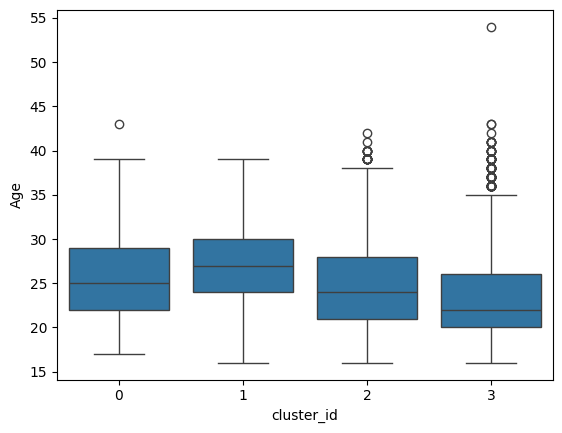

In [188]:
sns.boxplot(data=df_clustering, y="Age",x="cluster_id")

- Nejstarší hráči se nacházejí v druhem clusteru.
- Průměrný věk hráčů ve všech čtyřech clusterech se pohybuje mezi 23 a 30 lety.

### Výška hráčů v jednotlivých clusterech

<Axes: xlabel='cluster_id', ylabel='Height'>

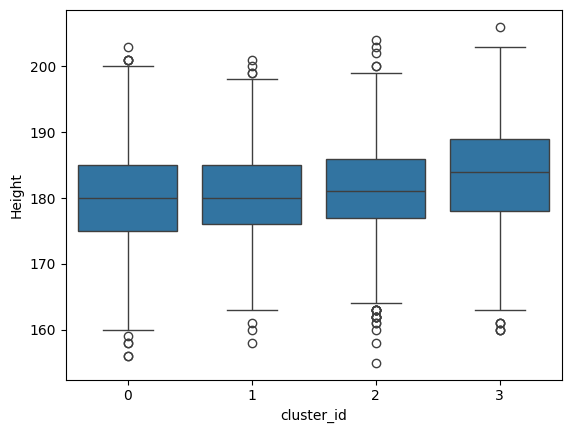

In [189]:
sns.boxplot(data=df_clustering, y="Height",x="cluster_id")

- Nejvyšší hráči se nacházejí ve 4. klastru.
- Ve všech ostatních klastrech je výška přibližně stejná.

### Celkové hodnocení (Overall) v clusterech

<Axes: xlabel='cluster_id', ylabel='Overall'>

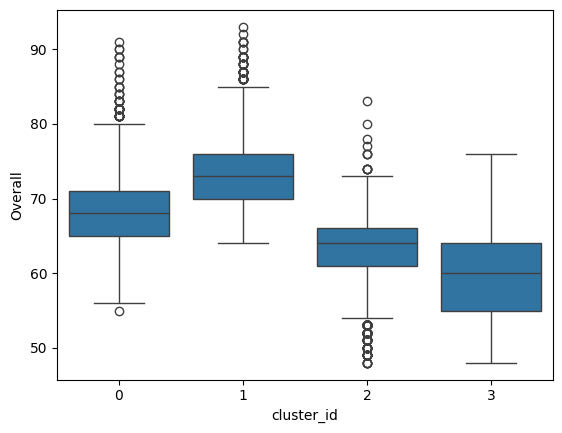

In [190]:
sns.boxplot(data=df_clustering, y="Overall",x="cluster_id")

- Je vidět, že hráči s nejvyšším celkovým hodnocením (Overall) se nacházejí v druhem clusteru, kde jejich průměrná hodnota je kolem 74.
- Nejnižší hodnoty Overall jsou v čtvrtém clusteru, kde průměrný ukazatel je přibližně 62.

###Cena hráčů (ValueEUR) v clusterech.

<Axes: xlabel='cluster_id', ylabel='ValueEUR'>

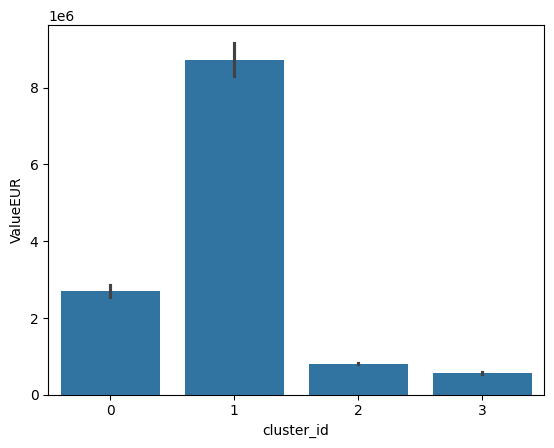

In [191]:
sns.barplot(data=df_clustering, y="ValueEUR",x="cluster_id")

- Tady je vidět, jak druhý cluster výrazně předčí ostatní clustery co se týče hodnoty hráčů.

- 3 a 4 cluster mají téměř stejné hodnoty.

### PreferredFoot

<Axes: xlabel='cluster_id', ylabel='count'>

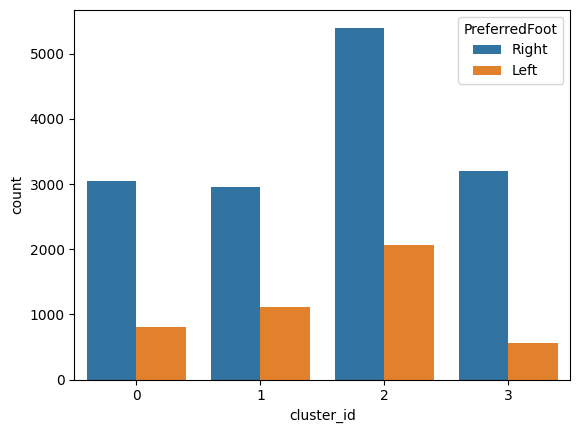

In [192]:
sns.countplot(data=df_clustering, x="cluster_id", hue="PreferredFoot")

- Je vidět, že ve všech clusterech převažují hráči, jejichž dominantní noha je pravá.

### BestPosition
- Rozdělení pozic v clusterech

<Axes: xlabel='cluster_id', ylabel='count'>

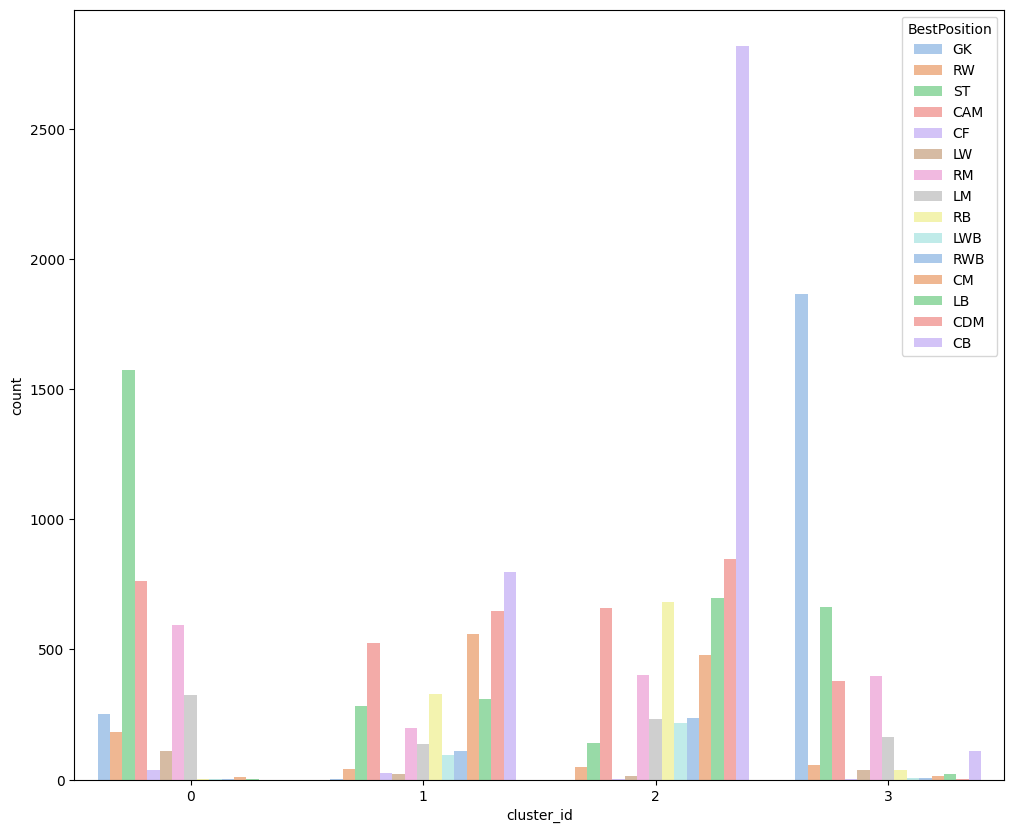

In [193]:
plt.figure(figsize=(12,10))
sns.countplot(data=df_clustering,x="cluster_id", hue="BestPosition",palette="pastel")

- Ve 1. clusteru většina hráčů má pozici Striker.

- Ve 2. clusteru většina hráčů má pozici Centre Forward.
- Ve 3. clusteru většina hráčů má pozici Centre Forward.
- Ve 4. clusteru většina hráčů má pozici Goalkeeper.

### Potential v clusterech

<Axes: xlabel='cluster_id', ylabel='Potential'>

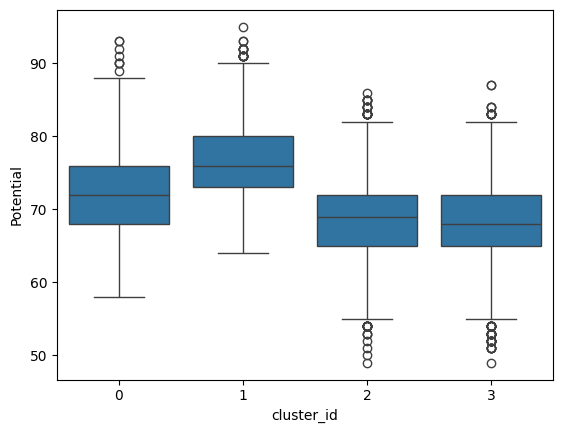

In [194]:
sns.boxplot(data=df_clustering, y="Potential",x="cluster_id")

-
Cluster s největším počtem hráčů s vysokým potenciálem je 2. cluster.

###ShootingTotal

<Axes: xlabel='cluster_id', ylabel='ShootingTotal'>

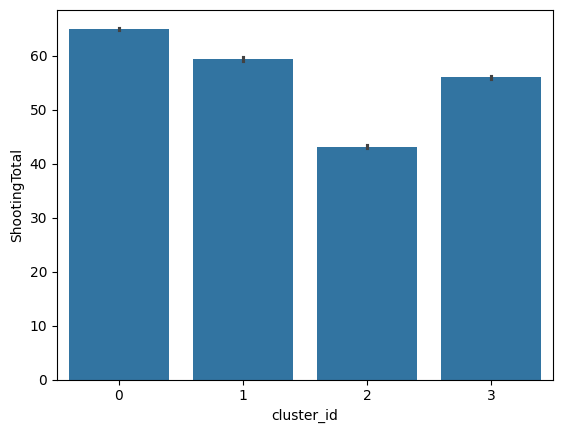

In [195]:
sns.barplot(data=df_clustering, y="ShootingTotal",x="cluster_id")

-
Hráči s nejvyšším počtem střel se nacházejí  v prvním  clusteru, zatímco s nejnižším počtem střel ve druhém.

###Reactions

<Axes: xlabel='cluster_id', ylabel='Reactions'>

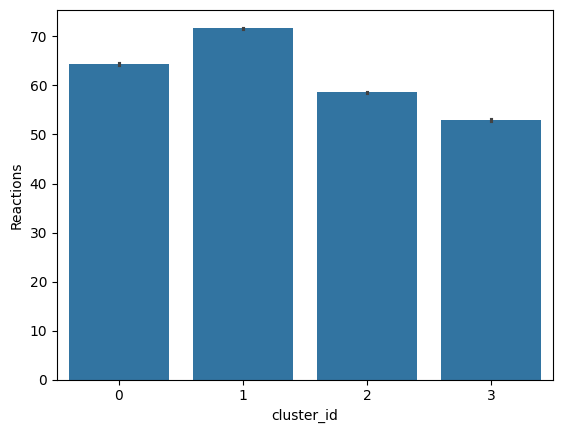

In [196]:
sns.barplot(data=df_clustering, y="Reactions",x="cluster_id")

- Hráči s nejlepšími reakcemi se nacházejí ve druhém clusteru.

###**Výstup pro KMean**s:

- Pro sloupce, které jsem vybral a upravil pro optimální zpracování algoritmem K-means, mi metoda Elbow ukázala, že ideální hodnota pro k je 4
- Můžeme si všimnout, že mladší hráči mají nižší cenu, zatímco starší hráči ve věku 25-30 let mají obvykle vyšší hodnotu.
- Přibližně 70 % hráčů považuje svou pravou nohu za dominantní, zatímco pouze 30 % tvrdí, že jejich dominantní noha je levá.
- Hráči, kteří mají vysoký Potential a Overall, mají vyšší tržní hodnotu.
- Jak překvapivé, ale hráči z druhého klastru, kteří jsou průměrně nejstarší ze všech čtyř klastrů, mají nejlepší reakce, na rozdíl od svých mladších kolegů.
- V prvním klastru se nachází největší počet útočníků, což koreluje s jejich nejvyšším počtem ShootingTotal.

### 2 - AgglomerativeClustering
- Choose any other algorithm from the documentation and repeat the steps from the Part 1
- Check some blog posts, book chapters, Youtube videos, ... about the algorithm you have chosen so you have some basic knowledge about the key concepts of the selected algorithm
- 🚀 Agglomerative clustering is a good starting point! 🙂
- ❌ BEWARE: This task is worth 10 points so skipping it means that the maximum score for the project will be 35 points!

In [335]:
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

###Vybrali jste náhodně 600 vzorků z datového rámce.








In [336]:
df_sample = df.sample(n=600, random_state=42)


###Vytvářím nový DataFrame df_enc, kde připojuji kódované hodnoty sloupců 'BestPosition', 'PreferredFoot' a 'Nationality' z náhodně vybraných 600 hráčů.








In [337]:
df_enc = pd.DataFrame(index=df_sample.index)
df_enc = df_enc.join(pd.get_dummies(df_sample[['BestPosition', 'PreferredFoot', 'Nationality']]))


###Normalizuji data pomocí MinMaxScaler a transformuji je pomocí PowerTransformer.

In [338]:

#MinMaxScaler
minmax_columns = [
    'Age', 'Height', 'Weight', 'Overall', 'Potential', 'PaceTotal',
    'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal',
    'PhysicalityTotal'
]

#PowerTransformer
power_columns = [
    'TotalStats', 'ValueEUR', 'Reactions', 'Aggression', 'Interceptions'
]

scaler = MinMaxScaler()
df_enc[minmax_columns] = scaler.fit_transform(df_sample[minmax_columns])

power_transformer = PowerTransformer()
df_enc[power_columns] = power_transformer.fit_transform(df_sample[power_columns])



###Vytvářím dendrogram pro vizualizaci hierarchického shlukování

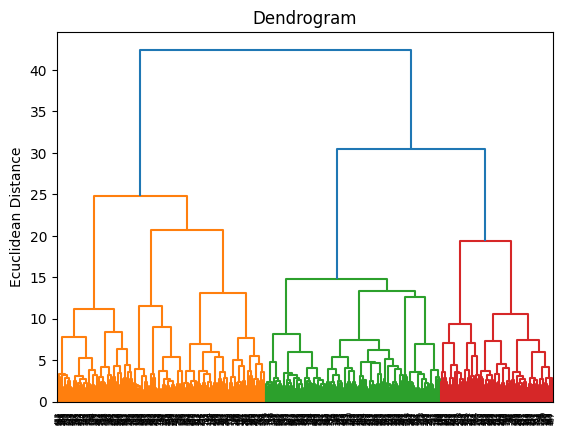

In [339]:
x = df_enc.values

dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))
plt.title('Dendrogram')
plt.ylabel('Ecuclidean Distance')
plt.show()


- Vytvořily se mi 3 clustery

###Používám algoritmus AgglomerativeClustering pro rozdělení na 3 clustery a počítám počet bodů v každém clusteru.

In [340]:
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_hc = hc.fit_predict(x)

pd.Series(hc.labels_).value_counts()


,count
0,252
2,212
1,136


###Používám PCA pro snížení dimenzionality na 2 komponenty.

In [341]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

-
PCA (Principal Component Analysis) je metoda pro zmenšení rozměrnosti, která umožňuje převést data na nový soubor proměnných (hlavních komponent), přičemž zachovává nejdůležitější informace a snižuje redundantnost.

###PCA projekce na 2D grafu

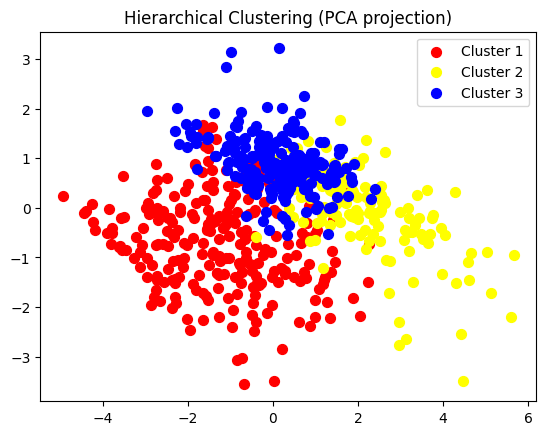

In [342]:
plt.scatter(x_pca[y_hc == 0, 0], x_pca[y_hc == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(x_pca[y_hc == 1, 0], x_pca[y_hc == 1, 1], s=50, c='yellow', label='Cluster 2')
plt.scatter(x_pca[y_hc == 2, 0], x_pca[y_hc == 2, 1], s=50, c='blue', label='Cluster 3')
plt.title('Hierarchical Clustering (PCA projection)')
plt.legend()
plt.show()


-
Tento kód zobrazuje 3 clustery pomocí PCA projekce na 2D grafu. Každý cluster je zobrazen jinou barvou (červená, žlutá a modrá).

In [343]:
df_sample['cluster_id'] = hc.labels_


###Vytvářím graf pro zobrazení rozdělení clusterů v datech.

<ipython-input-344-64ad7c8e9296>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_sample, x='cluster_id', palette='viridis')


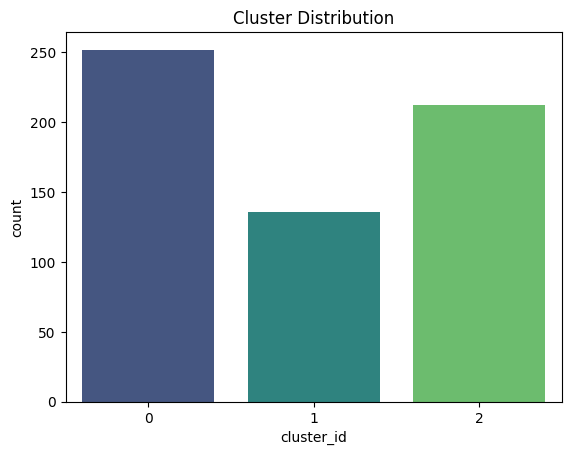

In [344]:
sns.countplot(data=df_sample, x='cluster_id', palette='viridis')
plt.title('Cluster Distribution')
plt.show()


###Boxplot věku podle clusteru a Boxplot výšky podle clusteru

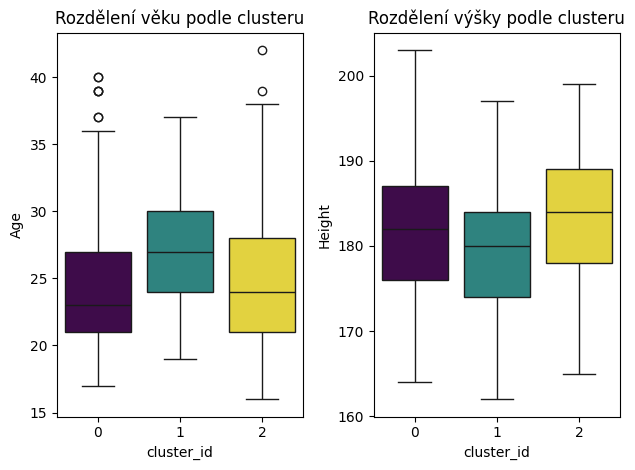

In [346]:

plt.subplot(1, 2, 1)
sns.boxplot(x='cluster_id', y='Age', data=df_sample, hue='cluster_id', palette='viridis', legend=False)
plt.title('Rozdělení věku podle clusteru')


plt.subplot(1, 2, 2)
sns.boxplot(x='cluster_id', y='Height', data=df_sample, hue='cluster_id', palette='viridis', legend=False)
plt.title('Rozdělení výšky podle clusteru')

plt.tight_layout()
plt.show()


- Nejstarší hráči se nacházejí ve druhém clusteru, jejich průměrný věk je kolem 26-27 let
- Nejmladší hráči jsou v prvním clusteru, jejich věk je kolem 23 let.


###Overall

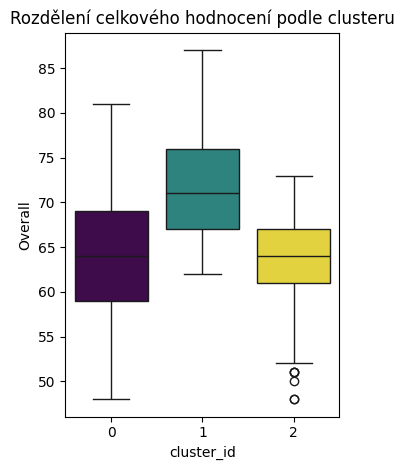

In [347]:

plt.subplot(1, 2, 1)
sns.boxplot(x='cluster_id', y='Overall', data=df_sample, hue='cluster_id', palette='viridis', legend=False)
plt.title('Rozdělení celkového hodnocení podle clusteru')

plt.tight_layout()
plt.show()


- Hráči s nejvyšším hodnocením Overall se nacházejí ve druhém clusteru, přičemž první a třetí cluster mají přibližně stejné hodnoty Overall mezi hráči.

###Potential

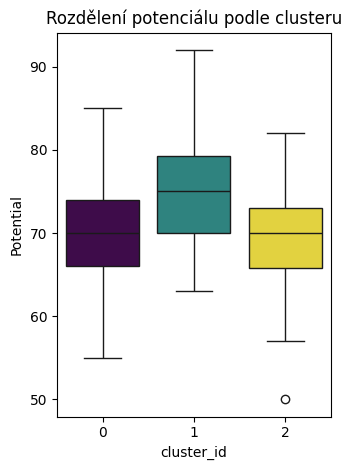

,Potential
cluster_id,
0,70.337302
1,74.889706
2,69.476415


In [348]:

plt.subplot(1, 2, 1)
sns.boxplot(x='cluster_id', y='Potential', data=df_sample, hue='cluster_id', palette='viridis', legend=False)
plt.title('Rozdělení potenciálu podle clusteru')

plt.tight_layout()
plt.show()

df_sample.groupby('cluster_id')['Potential'].mean()


- Druhý cluster obsahuje nejvíce potenciálních hráčů.
- Průměrný potenciál ve druhém clusteru je kolem 75.

###ValueEUR

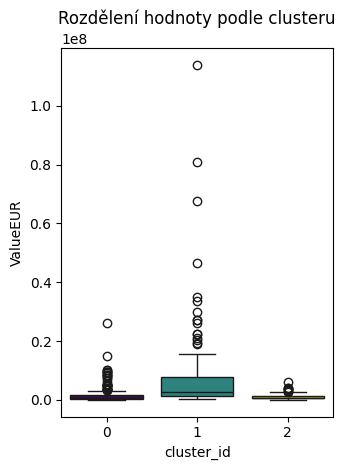

,ValueEUR
cluster_id,
0,1.628075e+06
1,7.768750e+06
2,1.008608e+06


In [350]:
plt.subplot(1, 2, 1)
sns.boxplot(x='cluster_id', y='ValueEUR', data=df_sample, hue='cluster_id', palette='viridis', legend=False)
plt.title('Rozdělení hodnoty podle clusteru')

plt.tight_layout()
plt.show()

df_sample.groupby('cluster_id')['ValueEUR'].mean()


 - Ve druhém clusteru se nachází nejdražší hráči.
 - V prvním a třetím clusteru jsou statistiky přibližně stejné."

###ShootingTotal

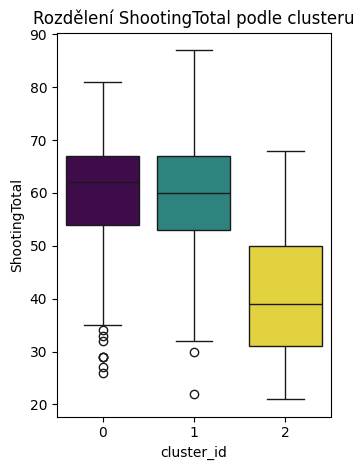

,ShootingTotal
cluster_id,
0,59.797619
1,58.808824
2,40.617925


In [352]:
plt.subplot(1, 2, 1)
sns.boxplot(x='cluster_id', y='ShootingTotal', data=df_sample, hue='cluster_id', palette='viridis', legend=False)
plt.title('Rozdělení ShootingTotal podle clusteru')

plt.tight_layout()
plt.show()


df_sample.groupby('cluster_id')['ShootingTotal'].mean()


- Na první a druhy cluster se ukázaly přibližně stejné hodnoty, kolem 60 střel na branku.

### 10 Nejběžnějších národností

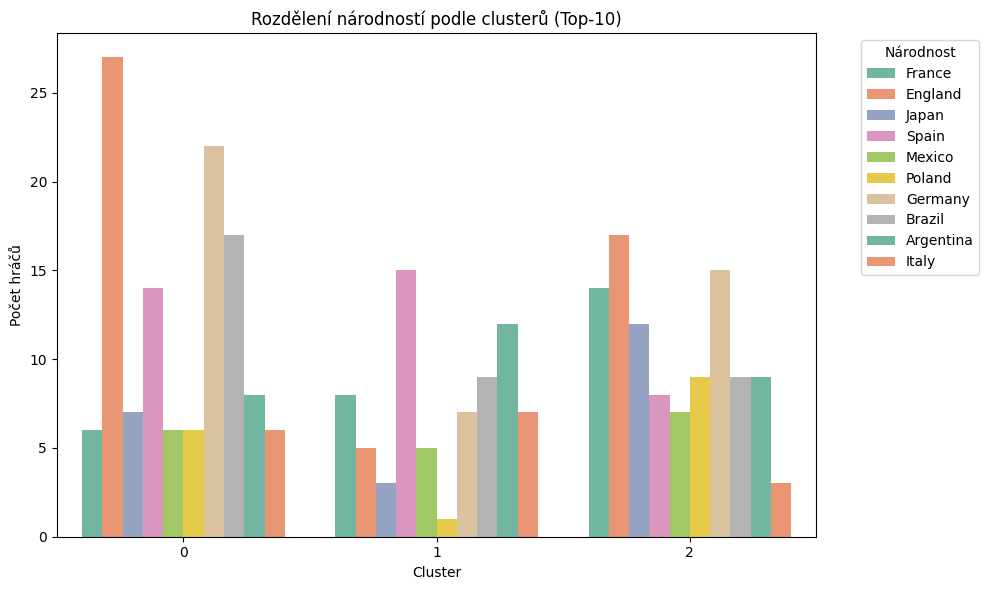

In [356]:
top_10_nationalities = df_sample['Nationality'].value_counts().head(10).index

df_sample_top10 = df_sample[df_sample['Nationality'].isin(top_10_nationalities)]

plt.figure(figsize=(10, 6))
sns.countplot(data=df_sample_top10, x='cluster_id', hue='Nationality', palette='Set2')
plt.title('Rozdělení národností podle clusterů (Top-10)')
plt.xlabel('Cluster')
plt.ylabel('Počet hráčů')
plt.legend(title='Národnost', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


- V prvním clusteru je nejvíce hráčů z Anglie.
- Také lze vyzdvihnout velké množství hráčů z Francie, Německa a Španělska.
- Hráči z těchto zemí dominují ve všech clusterech.

###Rozdělení pozic podle klastrů

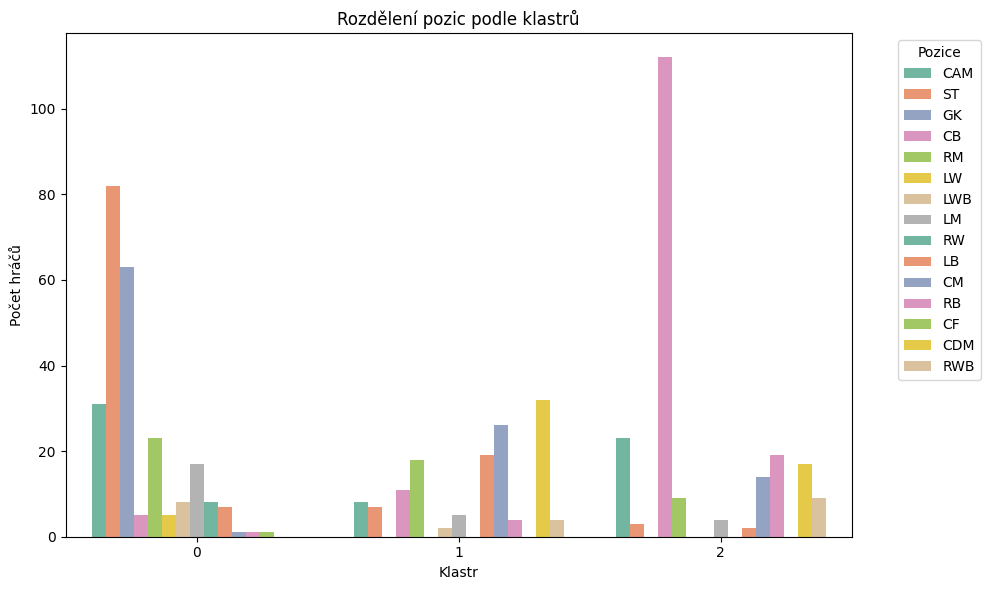

In [358]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_sample, x='cluster_id', hue='BestPosition', palette='Set2')
plt.title('Rozdělení pozic podle klastrů')
plt.xlabel('Klastr')
plt.ylabel('Počet hráčů')
plt.legend(title='Pozice', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


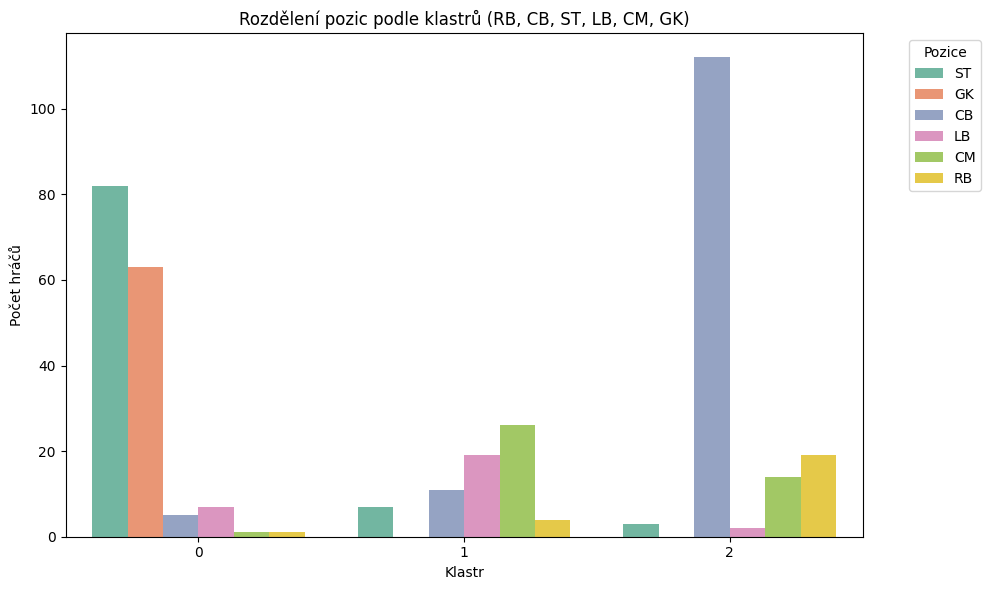

In [359]:

positions = ['RB', 'CB', 'ST', 'LB', 'CM', 'GK']
df_sample_positions = df_sample[df_sample['BestPosition'].isin(positions)]

plt.figure(figsize=(10, 6))
sns.countplot(data=df_sample_positions, x='cluster_id', hue='BestPosition', palette='Set2')
plt.title('Rozdělení pozic podle klastrů (RB, CB, ST, LB, CM, GK)')
plt.xlabel('Klastr')
plt.ylabel('Počet hráčů')
plt.legend(title='Pozice', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


- V prvním klastru vidíme, že většina hráčů má pozici útočníka (Striker) a brankáře (Goalkeeper).
- Ve třetím klastru je velké množství hráčů na pozici středního obránce (Center Back).

###Závěr

- První klastr obsahuje nejmladší hráče, jejichž průměrný věk je kolem 22-23 let, s průměrným hodnocením Overall, Potential a ValueEUR. Díky velkému počtu útočníků (ST) mají dobrou statistiku v oblasti ShootingTotal

- Druhý klastr obsahuje nejstarší hráče, jejichž průměrný věk je kolem 26-27 let. Má nejlepší hodnocení Overall, Potential a ValueEUR a má stejný ukazatel ShootingTotal jako první klastr.

- Třetí klastr má nejvyšší hráče. Ukazatele jako Overall a Potential jsou přibližně stejné jako v prvním klastru. Tento klastr má také nejlevnější hráče. ShootingTotal je nižší než u ostatních dvou klastrů o více než 30 %, což je způsobeno tím, že v tomto klastru je mnoho CB (Center Back).

### K-Means vs Agglomerative Clustering

## K-Means

Výhody:

- Rychlý při práci s velkými daty.
- Dobře funguje, když mají shluky kulový tvar a stejné velikosti.


Nevýhody:
- je nutné předem stanovit počet shluků (k)
- Špatně funguje, pokud mají shluky složitý nebo náhodný tvar.

### **Agglomerative Clustering**
Výhody:
- Nepotřebuje předem stanovený počet shluků.
- Zpracovává hierarchické vztahy mezi objekty.

Nevýhody:
- Pomalejší ve srovnání s K-Means, zejména u velkých objemů dat.
- Může být citlivý na šum v datech.

